# Affichage graphique: [matplotlib](https://matplotlib.org/)
Dominique Benielli, Eulalio Torres Garcia, Valentin Emiya, Aix-Marseille Université, novembre 2023.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Tracer-des-courbes" data-toc-modified-id="Tracer-des-courbes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tracer des courbes</a></span></li><li><span><a href="#Les-images" data-toc-modified-id="Les-images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Les images</a></span></li><li><span><a href="#Les-tracés-3D" data-toc-modified-id="Les-tracés-3D-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Les tracés 3D</a></span></li><li><span><a href="#Personnaliser-les-tracés" data-toc-modified-id="Personnaliser-les-tracés-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Personnaliser les tracés</a></span><ul class="toc-item"><li><span><a href="#Changer-les-paramètres-ponctuellement" data-toc-modified-id="Changer-les-paramètres-ponctuellement-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Changer les paramètres ponctuellement</a></span></li><li><span><a href="#Changer-les-paramètres-globalement" data-toc-modified-id="Changer-les-paramètres-globalement-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Changer les paramètres globalement</a></span></li></ul></li><li><span><a href="#À-retenir-pour-terminer" data-toc-modified-id="À-retenir-pour-terminer-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>À retenir pour terminer</a></span></li></ul></div>

## Introduction

`matplotlib`

* la bibliothèque de référence pour les tracés graphiques (concurrencée par [`plotly`](https://plotly.com/) et autres)
* très liée à `numpy` 
* la majorité des fonctions utiles sont dans `matplotlib.pyplot`

Il est très utile de s'inspirer des [exemples fournis](https://matplotlib.org/stable/gallery/index.html) et autres [tutoriels](https://matplotlib.org/stable/tutorials/index.html), et de se référer à la [documentation](https://matplotlib.org/stable/users/index.html).

## Tracer des courbes

Une première figure: une sinusoïde

In [19]:
t1 = np.linspace(0, 1, 10)
x1 = np.sin(2 * np.pi * t1)
print(x1.shape)

(10,)


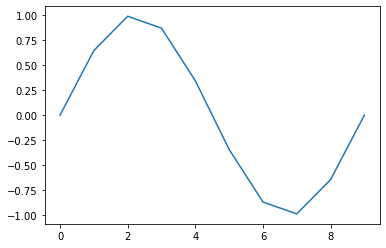

In [20]:
plt.plot(x1)  # NB dans un fichier .py, l'affichage nécessite d'ajouter plt.show()

Un tracé plus élaboré

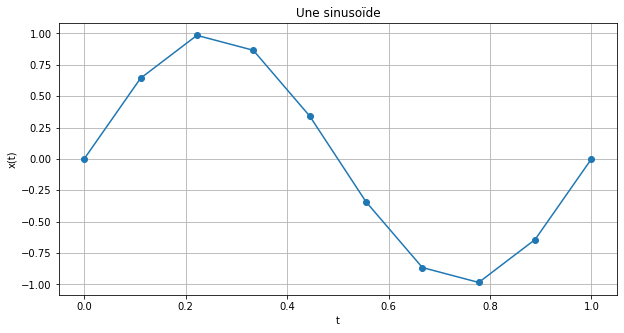

In [21]:
plt.figure(figsize=(10, 5))  # Ouvre une nouvelle figure et ajuste sa taille
plt.plot(t1, x1, 'o-')  # Trace x1 en utilisant les abscisses de tx1, avec des points
plt.xlabel('t')  # nom de l'axe des abscisses
plt.ylabel('x(t)')  # nom de l'axe des ordonnées
plt.grid()  # Affiche une grille
plt.title('Une sinusoïde')  # Titre en haut
plt.savefig('sinusoide.pdf')  # Exporte l'image au format pdf
plt.savefig('sinusoide.png')  # Exporte l'image au format png
# Question: pdf ou png?

Plusieurs courbes et davantage de personnalisation.

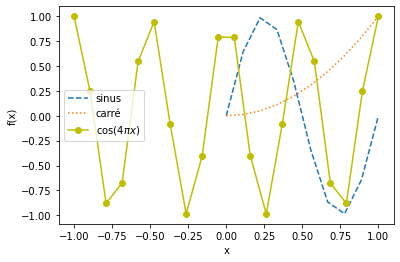

In [22]:
t2 = t1
x2 = t2 ** 2
t3 = np.linspace(-1, 1, 20)
x3 = np.cos(2 * np.pi * 2 * t3)

plt.plot(t1, x1, '--', label='sinus')  # tracé avec des tirets
plt.plot(t2, x2, ':', label='carré')  # tracé avec des pointilés
plt.plot(t3, x3, 'o-y', label='$\cos(4\pi x)$')  # tracé avec des ronds, un trait plein, en jaune
plt.xlabel('x')  # nom de l'axe des abscisses
plt.ylabel('f(x)')  # nom de l'axe des ordonnées
plt.legend()  # Affiche la légende
plt.savefig('3courbes.pdf')  # Exporte l'image au format pdf

In [23]:
# TODO: https://matplotlib.org/stable/users/explain/text/usetex.html

Une figure avec des sous-figures

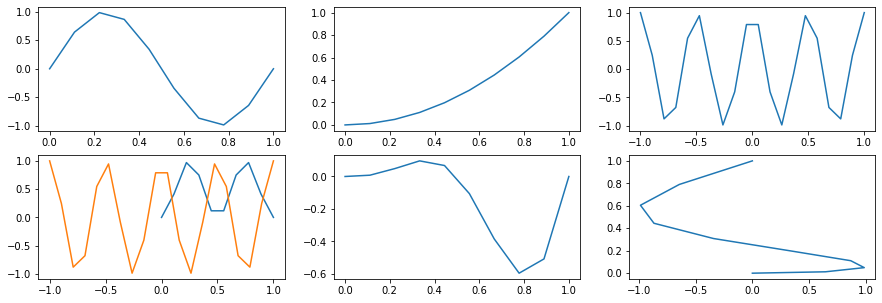

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))
ax[0, 0].plot(t1, x1)
ax[0, 1].plot(t2, x2)
ax[0, 2].plot(t3, x3)
ax[1, 0].plot(t1, x1 ** 2, t3, x3)
ax[1, 1].plot(t1, x1*x2)
ax[1, 2].plot(x1, x2)
plt.savefig('subplots.png')

In [25]:
# TODO annotate et fig anatomy

**Autres types de courbes 1D**

Histogrammes, courbes avec barres d'erreur, etc. Voir [exemples](https://matplotlib.org/stable/gallery/index.html#lines-bars-and-markers).

## Les images

Une image de base
* une matrice $H\times L$
* représentée sur une échelle de couleur personnalisable (*colormap*)

Une image en couleur sur $C$ canaux est un tableau $H\times L \times C$ avec $C=3$ ou $C=4$ en général.

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


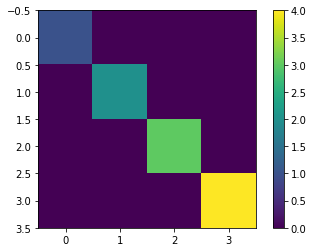

In [26]:
a = np.diag(np.arange(1, 5))
print(a)
plt.imshow(a)
plt.colorbar()

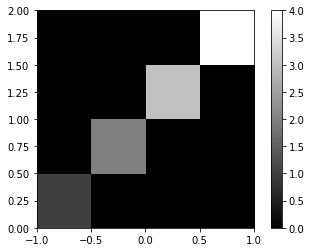

In [27]:
# Personnaliser la colormap, les valeurs sur les axes, l'orientation
xmin, xmax, ymin, ymax = -1, 1, 0, 2
plt.imshow(a, cmap='gray', extent=[xmin, xmax, ymin, ymax], origin='lower')
plt.colorbar()

In [28]:
# Liste des échelles de couleur prédéfinies
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

In [29]:
# TODO changer colormap en live hors notebook

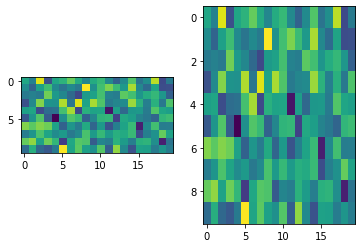

In [30]:
# Pixels carrés ('equal') ou image ajustée aux axes ('auto')
a = np.random.randn(10, 20)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(a, aspect='equal')
ax[1].imshow(a, aspect='auto')

**Importer (`imread`) et exporter (`imsave`) une image**

(784, 981, 3)


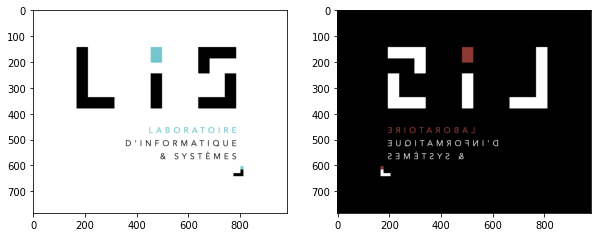

In [31]:
a = plt.imread('logo_LIS_color.jpg')
print(a.shape)
b = np.max(a) - a[:, ::-1]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(a)
ax[1].imshow(b)

Attention à bien distinguer les tableaux2D, les images, les figures.

En particulier, `savefig` exporte une figure et `imsave` exporte un tableau.

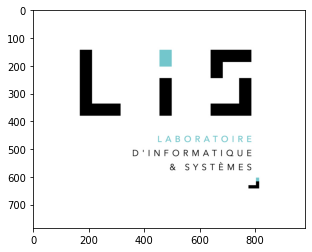

In [32]:
a = plt.imread('logo_LIS_color.jpg')
plt.imsave('logo_imsave.png', arr=a)

plt.imshow(a)
plt.savefig('logo_savefig.png')

Text(0.5, 1.0, 'logo_savefig')

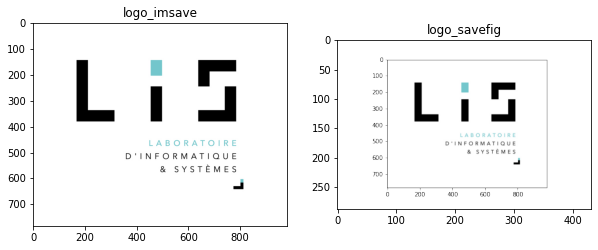

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(plt.imread('logo_imsave.png'))
ax[0].set_title('logo_imsave')
ax[1].imshow(plt.imread('logo_savefig.png'))
ax[1].set_title('logo_savefig')

## Les tracés 3D
Voir [exemples](https://matplotlib.org/stable/gallery/index#d-plotting).
Remarque: beaucoup de possibilités, mais on reste dans des outils de base et d'autres bibliothèques sont dédiées à la 3D.

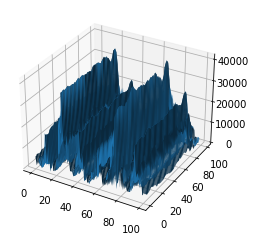

In [35]:
data = np.loadtxt('5MHz_S45S_PCS250mm_SONA1.txt')  # ../../data/
data = data[400:500, 500:600]
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
surf = ax.plot_surface(x, y, data)
# Voir aussi l'interface graphique hors notebook

## Personnaliser les tracés
Comment ajuster les couleurs, les polices, les tailles, etc.? Ponctuellement ou pour toutes les figures?

### Changer les paramètres ponctuellement
De nombreuses options permettent d'ajuster chaque paramètre. Voir la documentation pour chaque fonction/objet.

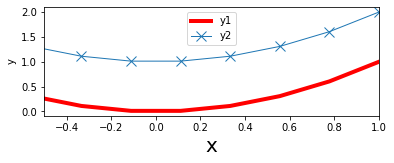

In [36]:
x = np.linspace(-1, 1, 10)
y = x ** 2
plt.figure(figsize=(6, 2))
plt.plot(x, y, label='y1', color='r', linewidth=4)
plt.plot(x, y+1, label='y2', linewidth=1, marker='x', markersize=10)
plt.legend(loc='upper center')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=10)
_ = plt.xlim(-0.5, 1)


### Changer les paramètres globalement

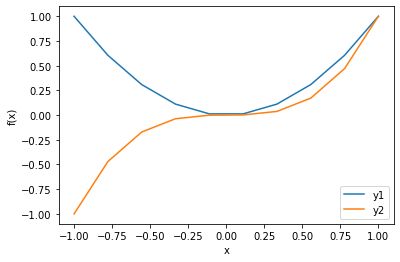

In [37]:
def trace():  # Une fonction de test
    x = np.linspace(-1, 1, 10)
    y1 = x ** 2
    y2 = x ** 3
    plt.plot(x, y1, label='y1')
    plt.plot(x, y2, label='y2')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
trace()

In [38]:
# Liste de tous les paramètres
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes

Paramètres notables:
* `figure.autolayout`: ajustement des bords de la figure 
* `figure.figsize`: dimension de la figure
* `font.size`: taille des polices
* `axes.grid`: affichage de la grille 
* `legend.loc`: position de la légende
* `image.aspect`: pixels carrés (`'equal'`) ou image ajustée aux axes (`'auto'`)
* `image.cmap`: colormap par défaut
* `image.origin`: origine en haut (`'upper'`) ou en bas (`'lower'`)
* `lines.linestyle`: style de tracé
* `lines.linewidth`: épaisseur de tracé
* `lines.marker`: marqueurs pour les points
* `lines.markersize`: taille des marqueurs




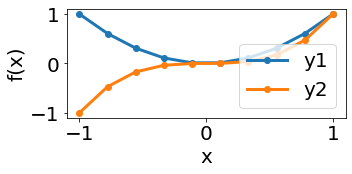

In [39]:
plt.rc('figure', figsize=(5, 2))
plt.rc('font', size=20)
plt.rc('lines', linewidth=3, marker='o')
trace()

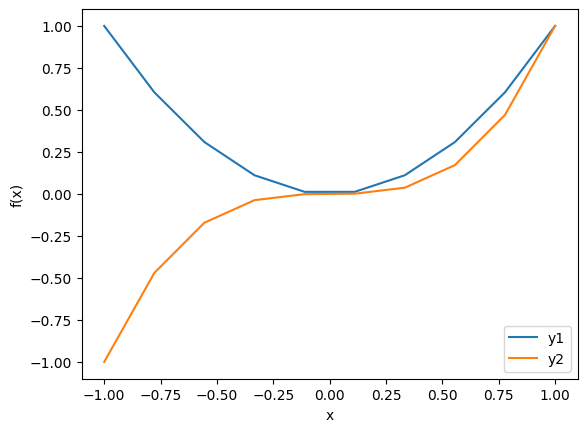

In [40]:
# Revenir aux paramètres par défaut
plt.rcdefaults()
trace()

## À retenir pour terminer

Structure hiérarchique:
* une figure contient un ou plusieurs axes (*subplots*)
* un axe = abscises, ordonnées, grille, légende
* un axe contient des tracés (courbe, image, histogramme, 3D, etc.)
* tracé: points, couleur, marqueurs, étiquette (*label*)

Nombreux styles de tracés, agencements, propriétés, etc.

$\rightarrow$ voir la [documentation et les exemples en ligne](https://matplotlib.org/stable/index.html).

**Questions?**

*Récap*

Place à la pratique!